# Análise de Dados de Empregos na área de Dados:



**Base de dados retirada do Kaggle: https://www.kaggle.com/datasets/saurabhshahane/data-science-jobs-salaries/**


---



Etapa 1: Preparação de Dados:

Carregar o arquivo CSV: Utilize uma linguagem de programação como Python para carregar os dados do arquivo CSV. Bibliotecas como Pandas podem ser usadas para facilitar esse processo.




In [ ]:
#Esse código em Python utiliza a biblioteca Pandas para manipulação e análise de dados.
import pandas as pd

# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv("/Data Science Jobs Salaries.csv")

# Exibir o DataFrame completo
df


#Essas configurações são úteis para lidar com conjuntos de dados grandes, permitindo visualizar todo o conteúdo do DataFrame, sem limitações de exibição de linhas, colunas ou largura de conteúdo.

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S
...,...,...,...,...,...,...,...,...,...,...,...
240,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
241,2021e,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
242,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
243,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L





---



Etapa 2: Limpeza e Normalização dos Dados:

Inclui a remoção de registros duplicados, tratamento de valores faltantes (como substituição ou remoção), e normalização de formatos (como converter textos para um formato padrão, ajustar datas, etc.).

In [ ]:
# Remover o caractere 'e' da coluna 'work_year'
df['work_year'] = df['work_year'].str.replace('e', '')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S
...,...,...,...,...,...,...,...,...,...,...,...
240,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
241,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
242,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
243,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [ ]:
# Verificar a quantidade de valores faltantes por coluna
print(df.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [ ]:
# Verificar se há linhas duplicadas
if df.duplicated().any():
    # Remover linhas duplicadas
    df.drop_duplicates(inplace=True)
    print("Linhas duplicadas removidas.")
else:
    print("Não há linhas duplicadas.")


Linhas duplicadas removidas.


In [ ]:
# Lista de colunas a serem removidas
colunas_para_remover = ['salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio']

# Remover as colunas especificadas do DataFrame
df = df.drop(columns=colunas_para_remover)

# Exibir as primeiras linhas do DataFrame após a remoção das colunas
df


,work_year,experience_level,employment_type,job_title,salary,company_location,company_size
0,2021,EN,FT,Data Science Consultant,54000,DE,L
1,2020,SE,FT,Data Scientist,60000,US,L
2,2021,EX,FT,Head of Data Science,85000,RU,M
3,2021,EX,FT,Head of Data,230000,RU,L
4,2021,EN,FT,Machine Learning Engineer,125000,US,S
...,...,...,...,...,...,...,...
240,2020,SE,FT,Data Scientist,412000,US,L
241,2021,MI,FT,Principal Data Scientist,151000,US,L
242,2020,EN,FT,Data Scientist,105000,US,S
243,2020,EN,CT,Business Data Analyst,100000,US,L


In [ ]:
# Dicionário de tradução dos nomes das colunas para o português
traducoes = {
    'work_year': 'Ano trabalho',
    'experience_level': "Nível de Experiência",
    'employment_type': "Período de Trabalho",
    'job_title': 'Cargo',
    'salary': 'Salário por ano',
    'company_location': 'País da Empresa',
    'company_size':'Tamanho da empresa'
    # Adicione mais traduções conforme necessário para todas as colunas do seu DataFrame
}

# Renomear as colunas utilizando o dicionário de tradução
df = df.rename(columns=traducoes)

# Exibir o DataFrame com as colunas traduzidas
df

,Ano trabalho,Nível de Experiência,Período de Trabalho,Cargo,Salário por ano,País da Empresa,Tamanho da empresa
0,2021,EN,FT,Data Science Consultant,54000,DE,L
1,2020,SE,FT,Data Scientist,60000,US,L
2,2021,EX,FT,Head of Data Science,85000,RU,M
3,2021,EX,FT,Head of Data,230000,RU,L
4,2021,EN,FT,Machine Learning Engineer,125000,US,S
...,...,...,...,...,...,...,...
240,2020,SE,FT,Data Scientist,412000,US,L
241,2021,MI,FT,Principal Data Scientist,151000,US,L
242,2020,EN,FT,Data Scientist,105000,US,S
243,2020,EN,CT,Business Data Analyst,100000,US,L


In [ ]:
# Reordenar as colunas como desejado
novas_colunas = ['Ano trabalho','Cargo','Nível de Experiência','País da Empresa','Tamanho da empresa','Período de Trabalho','Salário por ano']

# Reorganizar o DataFrame com as novas colunas
df_corrigido = df[novas_colunas]

# Exibir as colunas após a reorganização
print("\nColunas após a reorganização:")
df_corrigido


Colunas após a reorganização:


,Ano trabalho,Cargo,Nível de Experiência,País da Empresa,Tamanho da empresa,Período de Trabalho,Salário por ano
0,2021,Data Science Consultant,EN,DE,L,FT,54000
1,2020,Data Scientist,SE,US,L,FT,60000
2,2021,Head of Data Science,EX,RU,M,FT,85000
3,2021,Head of Data,EX,RU,L,FT,230000
4,2021,Machine Learning Engineer,EN,US,S,FT,125000
...,...,...,...,...,...,...,...
240,2020,Data Scientist,SE,US,L,FT,412000
241,2021,Principal Data Scientist,MI,US,L,FT,151000
242,2020,Data Scientist,EN,US,S,FT,105000
243,2020,Business Data Analyst,EN,US,L,CT,100000




---

Etapa 3: Análise Utilizando Listas:

Categorização de Dados: Criar listas para organizar os dados em categorias, como tipos de contrato, localizações, empresas, etc.


In [ ]:
# Criar listas de categorias para 'Cargo' e "Localização"
Cargo = df_corrigido['Cargo'].unique().tolist()
Localização = df_corrigido['País da Empresa'].unique().tolist()

# Ordenar as listas em ordem alfabética
Cargo.sort()
Localização.sort()

# Exibir as listas de categorias em ordem alfabética
print("Tipos de Cargo em ordem alfabética:")
print(Cargo)

print("\n Localização em ordem alfabética:")
print(Localização)


Tipos de Cargo em ordem alfabética:
['3D Computer Vision Researcher', 'AI Scientist', 'Applied Data Scientist', 'Applied Machine Learning Scientist', 'BI Data Analyst', 'Big Data Architect', 'Big Data Engineer', 'Business Data Analyst', 'Cloud Data Engineer', 'Computer Vision Engineer', 'Computer Vision Software Engineer', 'Data Analyst', 'Data Analytics Engineer', 'Data Analytics Manager', 'Data Architect', 'Data Engineer', 'Data Engineering Manager', 'Data Science Consultant', 'Data Science Engineer', 'Data Science Manager', 'Data Scientist', 'Data Specialist', 'Director of Data Engineering', 'Director of Data Science', 'Finance Data Analyst', 'Financial Data Analyst', 'Head of Data', 'Head of Data Science', 'Lead Data Analyst', 'Lead Data Engineer', 'Lead Data Scientist', 'ML Engineer', 'Machine Learning Engineer', 'Machine Learning Infrastructure Engineer', 'Machine Learning Scientist', 'Manager Data Science', 'Marketing Data Analyst', 'Principal Data Analyst', 'Principal Data Engi



---



Etapa 4: Filtragem e Ordenação:

Implementar funcionalidades para filtrar (ex: empregos com salários acima de um certo valor) e ordenar os dados (ex: empregos por data de publicação ou salário) usando listas.


In [ ]:
# Filtrar cargos com salários acima de 600.000
cargos_salario_acima_1500 = df_corrigido[df_corrigido['Salário por ano'] > 600000]['Cargo'].unique().tolist()
print("Cargos com salários acima de 600.000 por ano:")
print(cargos_salario_acima_1500)


Cargos com salários acima de 600.000 por ano:
['Data Engineer', 'BI Data Analyst', 'Data Scientist', 'Machine Learning Engineer', 'Big Data Engineer', 'Data Science Manager', 'AI Scientist', 'Lead Data Analyst']


In [ ]:
# Ordenar Cargos por maior salário
cargo_por_maior_salario = df_corrigido.groupby('Cargo')['Salário por ano'].max().sort_values(ascending=False)
print("Cargos por maior salário:")
print(cargo_por_maior_salario)


Cargos por maior salário:
Cargo
Data Scientist                              30400000
BI Data Analyst                             11000000
Data Science Manager                         7000000
Machine Learning Engineer                    4900000
Data Engineer                                4450000
Big Data Engineer                            1672000
Lead Data Analyst                            1450000
AI Scientist                                 1335000
Principal Data Engineer                       600000
Research Scientist                            450000
Product Data Analyst                          450000
Financial Data Analyst                        450000
Data Analyst                                  450000
Data Science Consultant                       423000
Applied Machine Learning Scientist            423000
Principal Data Scientist                      416000
3D Computer Vision Researcher                 400000
Director of Data Science                      325000
Lead Data Engi

In [ ]:
# Contar o número de vagas de emprego por localização e ordenar
local_com_cargos = df_corrigido['País da Empresa'].value_counts().sort_values(ascending=False)

# Exibir Locais ordenados pela quantidade de vagas de emprego
print("Localização da Empresa e a quantidade de vagas de emprego:")
print(local_com_cargos)



Localização da Empresa e a quantidade de vagas de emprego:
US    108
DE     18
IN     17
GB     16
FR     11
CA     11
ES      7
JP      4
DK      3
TR      3
AT      3
PL      3
NL      3
MX      2
CN      2
RU      2
NG      2
PT      2
LU      2
GR      2
BR      2
PK      2
SI      1
SG      1
HU      1
KE      1
CO      1
NZ      1
IR      1
CL      1
BE      1
CH      1
AE      1
IT      1
MD      1
VN      1
AS      1
HR      1
IL      1
UA      1
MT      1
Name: País da Empresa, dtype: int64




---
Etapa 5: Análise Utilizando Árvores de Busca:

Implementação de Árvores: Construir árvores de busca binária ou árvores balanceadas (como AVL ou Red-Black Trees) para efetuar buscas rápidas por critérios específicos (ex: busca por habilidades exigidas ou localização).



In [ ]:
#Árvore de busca binária para encontrar o cargo com o maior salário.

# Definir a classe Node para representar um nó na árvore de busca binária
class Node:
    def __init__(self, salary, job):
        self.salary = salary  # Salário associado ao nó
        self.job = job  # Cargo associado ao nó
        self.left = None  # Referência ao nó à esquerda
        self.right = None  # Referência ao nó à direita

# Definir a classe BinarySearchTree para implementar a árvore de busca binária
class BinarySearchTree:
    def __init__(self):
        self.root = None  # Inicializa a raiz da árvore como vazia

    # Método para inserir um novo nó na árvore
    def insert(self, salary, job):
        if self.root is None:  # Se a árvore estiver vazia, insere o novo nó como raiz
            self.root = Node(salary, job)
        else:
            self._insert(self.root, salary, job)

    # Método privado para inserção recursiva de um novo nó na árvore
    def _insert(self, node, salary, job):
        if salary < node.salary:  # Se o salário for menor que o salário do nó atual, insere à esquerda
            if node.left is None:
                node.left = Node(salary, job)
            else:
                self._insert(node.left, salary, job)
        elif salary > node.salary:  # Se o salário for maior, insere à direita
            if node.right is None:
                node.right = Node(salary, job)
            else:
                self._insert(node.right, salary, job)
        else:  # Se o salário já existe, atualiza o cargo associado ao nó
            node.job = job

    # Método para encontrar o cargo com o maior salário na árvore
    def find_max_salary(self):
        return self._find_max_salary(self.root)

    # Método privado para encontrar recursivamente o nó com o maior salário (nó mais à direita)
    def _find_max_salary(self, node):
        if node is None or node.right is None:  # Chegou ao nó mais à direita
            return node.job, node.salary
        return self._find_max_salary(node.right)  # Continua buscando à direita

# Criar a árvore e inserir os salários e cargos do DataFrame
tree = BinarySearchTree()

# Iterar sobre o DataFrame e inserir os salários e cargos na árvore
for index, row in df_corrigido.iterrows():
    tree.insert(row['Salário por ano'], row['Cargo'])

# Encontrar o cargo com o maior salário na árvore
cargo_maior_salario, maior_salario = tree.find_max_salary()
print(f"Cargo com o maior salário: {cargo_maior_salario} - Salário por ano: {maior_salario}")


Cargo com o maior salário: Data Scientist - Salário por ano: 30400000


In [ ]:
#Árvore de busca binária para encontrar o local com mais vagas de emprego para cientista de dados.

# Definir a classe Node para representar um nó na árvore de busca binária
class Node:
    def __init__(self, vacancies, city):
        self.vacancies = vacancies  # Número de vagas associadas ao nó
        self.city = city  #local associado ao nó
        self.left = None  # Referência ao nó à esquerda
        self.right = None  # Referência ao nó à direita

# Definir a classe BinarySearchTree para implementar a árvore de busca binária
class BinarySearchTree:
    def __init__(self):
        self.root = None  # Inicializa a raiz da árvore como vazia

    # Método para inserir um novo nó na árvore
    def insert(self, vacancies, city):
        if self.root is None:  # Se a árvore estiver vazia, insere o novo nó como raiz
            self.root = Node(vacancies, city)
        else:
            self._insert(self.root, vacancies, city)

    # Método privado para inserção recursiva de um novo nó na árvore
    def _insert(self, node, vacancies, city):
        if vacancies < node.vacancies:  # Se o número de vagas for menor que o do nó atual, insere à esquerda
            if node.left is None:
                node.left = Node(vacancies, city)
            else:
                self._insert(node.left, vacancies, city)
        elif vacancies > node.vacancies:  # Se o número de vagas for maior, insere à direita
            if node.right is None:
                node.right = Node(vacancies, city)
            else:
                self._insert(node.right, vacancies, city)
        else:  # Se o número de vagas já existe, atualiza o local associado ao nó
            node.city = city

    # Método para encontrar o local com mais vagas para Cientista de Dados na árvore
    def find_max_vacancies(self):
        return self._find_max_vacancies(self.root)

    # Método privado para encontrar recursivamente o nó com o maior número de vagas (nó mais à direita)
    def _find_max_vacancies(self, node):
        if node is None:  # Se o nó for nulo, retorna um valor indicando ausência de dados
            return None, 0  # Ou qualquer valor que faça sentido para indicar ausência de dados

        if node.right is None:  # Chegou ao nó mais à direita
            return node.city, node.vacancies

        return self._find_max_vacancies(node.right)  # Continua buscando à direita

# Criar a árvore e inserir as vagas de emprego de Cientista de Dados do DataFrame
tree = BinarySearchTree()

# Iterar sobre o DataFrame e inserir as vagas de Cientista de Dados na árvore
for index, row in df_corrigido.iterrows():
    if row['Cargo'] == 'Data Scientist':
        tree.insert(row['Cargo'], row['País da Empresa'])

# Encontrar o Local com mais vagas para Cientista de Dados na árvore
local_mais_vagas, total_vagas = tree.find_max_vacancies()
print(f"Local com mais vagas pro cargo de Cientista de Dados: {local_mais_vagas}")


Local com mais vagas pro cargo de Cientista de Dados: US


Buscas Eficientes:

Utilizar a estrutura de árvore para realizar buscas eficientes, por exemplo, encontrar todos os empregos que exigem uma habilidade específica.


In [ ]:
#Árvore de busca para encontrar a quantidade de cargos de Cientista de Dados em US( local com mais vagas,como visto anteriormente)
# Definir a classe Node para representar um nó na árvore de busca binária
class Node:
    def __init__(self, job, city):
        self.job = job  # Cargo associado ao nó
        self.city = city  # Local associado ao nó
        self.count = 1  # Contador de ocorrências do cargo no local (inicia em 1, pois é a primeira ocorrência)
        self.left = None  # Referência ao nó à esquerda
        self.right = None  # Referência ao nó à direita

# Definir a classe BinarySearchTree para implementar a árvore de busca binária
class BinarySearchTree:
    def __init__(self):
        self.root = None  # Inicializa a raiz da árvore como vazia

    # Método para inserir um novo nó na árvore
    def insert(self, job, city):
        if self.root is None:  # Se a árvore estiver vazia, insere o novo nó como raiz
            self.root = Node(job, city)
        else:
            self._insert(self.root, job, city)

    # Método privado para inserção recursiva de um novo nó na árvore
    def _insert(self, node, job, city):
        if job == node.job and city == node.city:  # Se já existe o mesmo cargo no mesmo local, incrementa o contador
            node.count += 1
        elif job < node.job:  # Se o cargo for menor que o do nó atual, insere à esquerda
            if node.left is None:
                node.left = Node(job, city)
            else:
                self._insert(node.left, job, city)
        else:  # Se o cargo for maior, insere à direita
            if node.right is None:
                node.right = Node(job, city)
            else:
                self._insert(node.right, job, city)

    # Método para contar o número de cargos em um determinado local na árvore
    def count_jobs_in_city(self, job, city):
        return self._count_jobs_in_city(self.root, job, city)

    # Método privado para contar recursivamente o número de ocorrências de um cargo em um local específico
    def _count_jobs_in_city(self, node, job, city):
        if node is None:
            return 0
        if node.job == job and node.city == city:  # Se encontrou o cargo no local, retorna o contador
            return node.count
        elif job < node.job:  # Se o cargo for menor, continua a busca à esquerda
            return self._count_jobs_in_city(node.left, job, city)
        else:  # Se o cargo for maior, continua a busca à direita
            return self._count_jobs_in_city(node.right, job, city)

# Criar a árvore e inserir os cargos de Cientista de Dados no Rio de Janeiro do DataFrame
tree = BinarySearchTree()

# Iterar sobre o DataFrame e inserir os cargos de Cientista de Dados no Rio de Janeiro na árvore
for index, row in df_corrigido.iterrows():
    if row['Cargo'] == 'Data Scientist' and row['País da Empresa'] == 'US':
        tree.insert(row['Cargo'], row['País da Empresa'])

# Encontrar a quantidade de cargos de Cientista de Dados no Rio de Janeiro na árvore
quantidade_cargos_us = tree.count_jobs_in_city('Data Scientist', 'US')
print(f"Quantidade de cargos de Cientista de Dados em US: {quantidade_cargos_us}")



Quantidade de cargos de Cientista de Dados em US: 20


In [ ]:
#Árvore de busca para encontrar a quantidade de cargos de Cientista de Dados em todos os locais


# Definir a classe Node para representar um nó na árvore de busca binária
class Node:
    def __init__(self, job, city):
        self.job = job  # Cargo associado ao nó
        self.city = city  # local associado ao nó
        self.count = 1  # Contador de ocorrências do cargo em um local (inicia em 1, pois é a primeira ocorrência)
        self.left = None  # Referência ao nó à esquerda
        self.right = None  # Referência ao nó à direita

# Definir a classe BinarySearchTree para implementar a árvore de busca binária
class BinarySearchTree:
    def __init__(self):
        self.root = None  # Inicializa a raiz da árvore como vazia

    # Método para inserir um novo nó na árvore
    def insert(self, job, city):
        if self.root is None:  # Se a árvore estiver vazia, insere o novo nó como raiz
            self.root = Node(job, city)
        else:
            self._insert(self.root, job, city)

    # Método privado para inserção recursiva de um novo nó na árvore
    def _insert(self, node, job, city):
        if job == node.job and city == node.city:  # Se já existe o mesmo cargo no mesmo local, incrementa o contador
            node.count += 1
        elif job < node.job:  # Se o cargo for menor que o do nó atual, insere à esquerda
            if node.left is None:
                node.left = Node(job, city)
            else:
                self._insert(node.left, job, city)
        else:  # Se o cargo for maior, insere à direita
            if node.right is None:
                node.right = Node(job, city)
            else:
                self._insert(node.right, job, city)

    # Método para contar o número de ocorrências de um cargo em todos os locais na árvore
    def count_jobs_in_all_cities(self, job):
        return self._count_jobs_in_all_cities(self.root, job)

    # Método privado para contar recursivamente o número de ocorrências de um cargo em todos os locais
    def _count_jobs_in_all_cities(self, node, job):
        if node is None:
            return 0
        if node.job == job:  # Se encontrou o cargo, conta suas ocorrências em todos os nós da árvore
            return node.count + self._count_jobs_in_all_cities(node.left, job) + self._count_jobs_in_all_cities(node.right, job)
        elif job < node.job:  # Se o cargo for menor, continua a busca à esquerda
            return self._count_jobs_in_all_cities(node.left, job)
        else:  # Se o cargo for maior, continua a busca à direita
            return self._count_jobs_in_all_cities(node.right, job)

# Criar a árvore e inserir as vagas de Cientista de Dados de todos os locais do DataFrame
tree = BinarySearchTree()

# Iterar sobre o DataFrame e inserir os cargos de Cientista de Dados de todos os locaisna árvore
for index, row in df_corrigido.iterrows():
    if row['Cargo'] == 'Data Scientist':
        tree.insert(row['Cargo'], row['País da Empresa'])

# Encontrar a quantidade de vagas de Cientista de Dados em todos os locais na árvore
quantidade_vagas_cargos = tree.count_jobs_in_all_cities('Data Scientist')
print(f"Quantidade de vagas de Cientista de Dados em todos os locais: {quantidade_vagas_cargos}")


Quantidade de vagas de Cientista de Dados em todos os locais: 58




---

Etapa 6 :Análise Utilizando Grafos:

Construção de Grafos: Desenvolver grafos para representar relações entre diferentes aspectos dos dados, como a relação entre localização e faixa salarial ou entre empresas e tipos de contrato.


O grafo abaixo mostra a relação entre os cinco cargos principais de ciência de dados, considerando os anos com o maior número de vagas para cada cargo.

Cada nó representa um ano e cada cargo está conectado aos anos em que teve o maior número de vagas.

Isso ajuda a identificar quais anos tiveram maior demanda para os cargos de ciência de dados.

No entanto, é importante notar que se o grafo mostra apenas dois anos para cada cargo,pois são os anos apresentados no dataframe

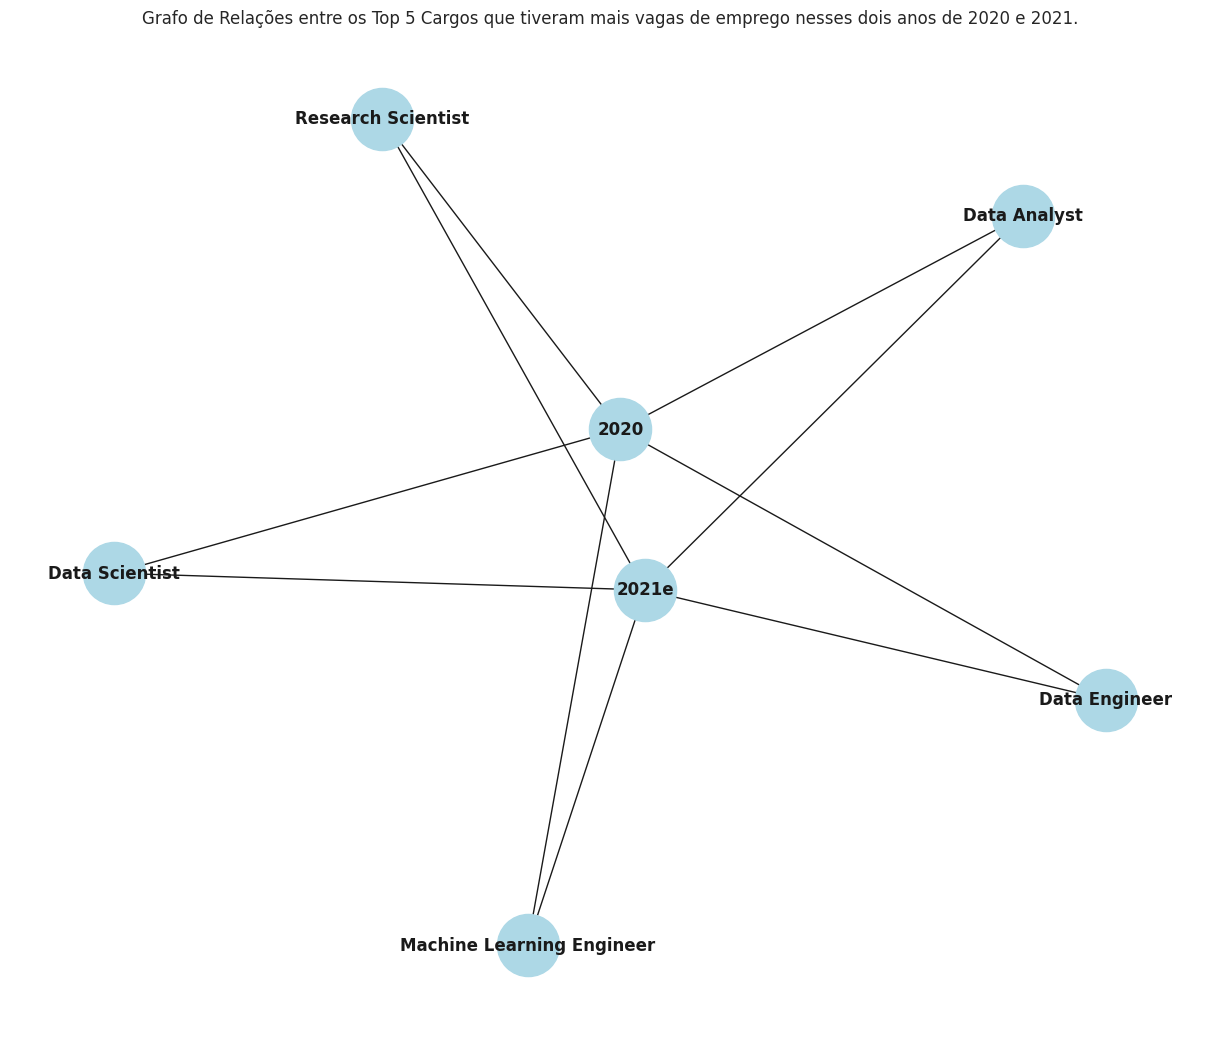

In [ ]:
import pandas as pd  # Importação da biblioteca pandas para manipulação de dados
import networkx as nx  # Importação da biblioteca NetworkX para criação e manipulação de grafos
import matplotlib.pyplot as plt  # Importação da biblioteca Matplotlib para visualização de dados

# Carregar o DataFrame a partir de um arquivo CSV contendo dados de empregos em Ciência de Dados
df = pd.read_csv("/Data Science Jobs Salaries.csv")

# Calcular a contagem de vagas para cada ano de experiência e cargo
vagas_por_exp_cargo = df.groupby(['work_year', 'job_title']).size().reset_index(name='num_vagas')

# Selecionar os top 5 cargos com a maior contagem de vagas
top_5_cargos = vagas_por_exp_cargo.groupby('job_title')['num_vagas'].sum().nlargest(5).index.tolist()

# Criar um grafo vazio usando NetworkX para representar as relações entre anos de experiência e cargos
G = nx.Graph()

# Iterar sobre cada cargo nos top 5
for cargo in top_5_cargos:
    # Filtrar os anos de experiência que têm mais vagas para um cargo específico
    exp_com_vagas_por_cargo = vagas_por_exp_cargo[vagas_por_exp_cargo['job_title'] == cargo].nlargest(5, 'num_vagas')['work_year'].tolist()

    # Adicionar nós ao grafo com base nos anos de experiência com mais vagas para esse cargo
    for exp in exp_com_vagas_por_cargo:
        G.add_node(exp)

        # Filtrar o DataFrame original para conter apenas os anos de experiência com vagas para esse cargo
        df_filtrado = df[(df['work_year'] == exp) & (df['job_title'] == cargo)]

        # Criar arestas com base na relação entre Ano de Experiência e Cargo no DataFrame filtrado
        for _, row in df_filtrado.iterrows():
            G.add_edge(row['work_year'], row['job_title'])  # Adicionar uma aresta entre o ano de experiência e o cargo

# Desenhar o grafo usando Matplotlib para visualizar as relações entre os Top 5 Cargos e suas Experiências de Trabalho
plt.figure(figsize=(12, 10))  # Definir o tamanho da figura
pos = nx.spring_layout(G)  # Definir o layout do grafo (posições dos nós)
nx.draw(G, pos, with_labels=True, node_color="lightblue", font_weight="bold", node_size=2000)  # Desenhar o grafo
plt.title('Grafo de Relações entre os Top 5 Cargos que tiveram mais vagas de emprego nesses dois anos de 2020 e 2021.')  # Definir o título do gráfico
plt.show()  # Mostrar o gráfico


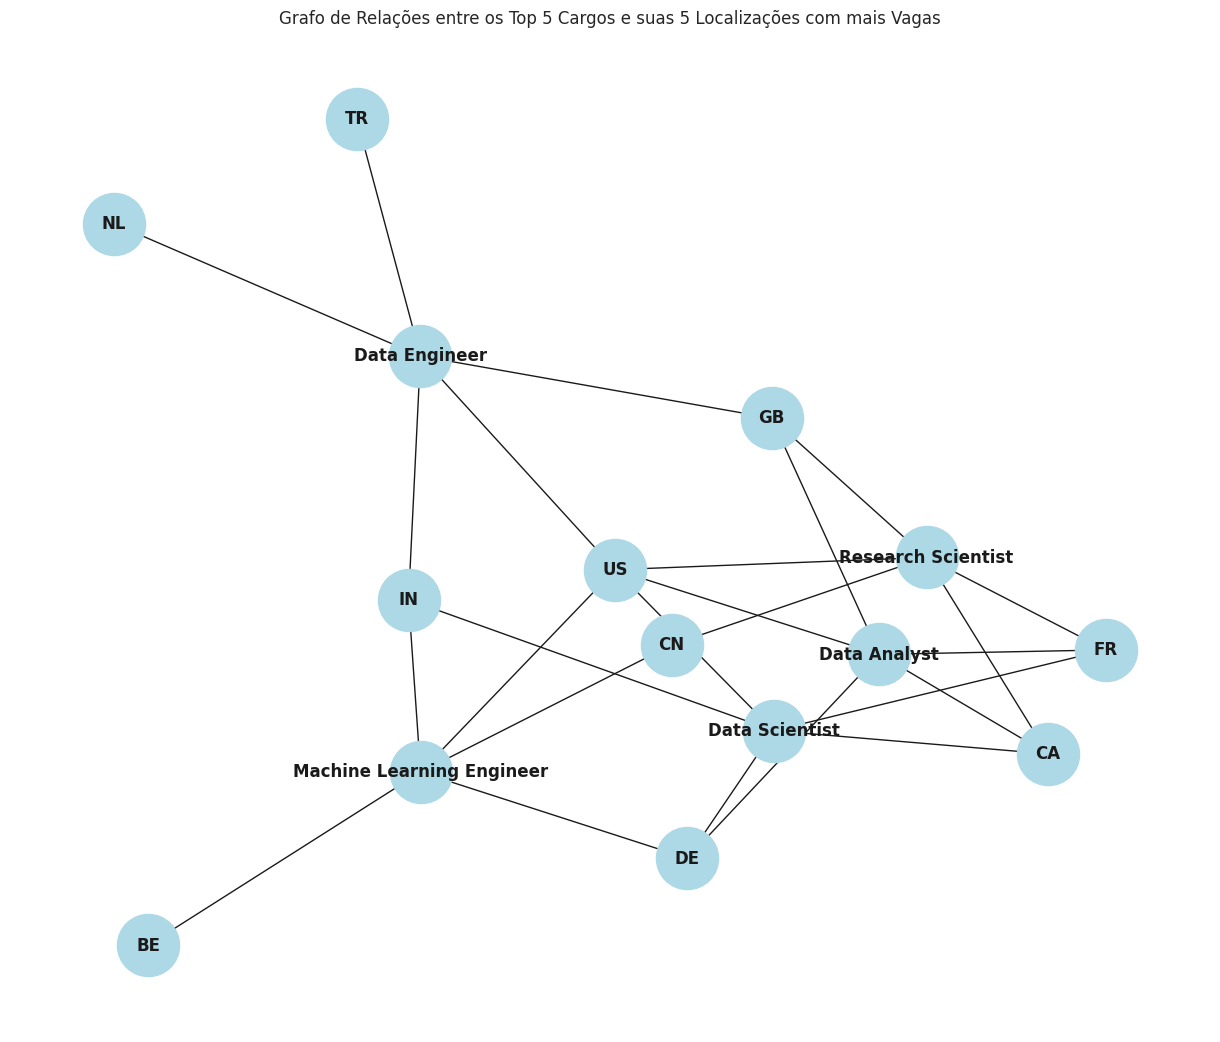

In [ ]:
import pandas as pd  # Importação da biblioteca pandas para manipulação de dados
import networkx as nx  # Importação da biblioteca NetworkX para criação e manipulação de grafos
import matplotlib.pyplot as plt  # Importação da biblioteca Matplotlib para visualização de dados

# Carregar o DataFrame a partir de um arquivo CSV
df = pd.read_csv("/Data Science Jobs Salaries.csv")

# Calcular a contagem de vagas para cada localização e cargo
vagas_por_local_cargo = df.groupby(['company_location', 'job_title']).size().reset_index(name='num_vagas')

# Selecionar os top 5 cargos com a maior contagem de vagas
top_5_cargos = vagas_por_local_cargo.groupby('job_title')['num_vagas'].sum().nlargest(5).index.tolist()

# Criar um gráfico vazio usando NetworkX
G = nx.Graph()

# Iterar sobre cada cargo dos top 5
for cargo in top_5_cargos:
    # Filtrar as localizações que têm vagas para um cargo específico
    locais_com_vagas_por_cargo = vagas_por_local_cargo[vagas_por_local_cargo['job_title'] == cargo].nlargest(5, 'num_vagas')['company_location'].tolist()

    # Adicionar nós ao grafo com base nas localizações com mais vagas para esse cargo
    for loc in locais_com_vagas_por_cargo:
        G.add_node(loc)

        # Filtrar o DataFrame original para conter apenas as localizações com vagas para esse cargo
        df_filtrado = df[(df['company_location'] == loc) & (df['job_title'] == cargo)]

        # Criar arestas com base na relação entre Localização e Carga no DataFrame filtrado
        for _, row in df_filtrado.iterrows():
            G.add_edge(row['company_location'], row['job_title'])  # Adicionar uma aresta entre a localização e o cargo

# Desenhar o gráfico usando Matplotlib
plt.figure(figsize=(12, 10))  # Definir o tamanho da figura
pos = nx.spring_layout(G)  # Definir o layout do gráfico (posições dos nós)
nx.draw(G, pos, with_labels=True, node_color="lightblue", font_weight="bold", node_size=2000)  # Desenhar o gráfico
plt.title('Grafo de Relações entre os Top 5 Cargos e suas 5 Localizações com mais Vagas')  # Definir o título do gráfico
plt.show()  # Mostrar o gráfico


Análise de Grafos:

 Aplicar algoritmos de grafos para explorar essas relações, como encontrar os caminhos mais curtos, clusters, ou componentes conectados.

 OBS: Aplicamos esse algoritmos no mesmo grafo acima (Grafo de Relações entre os Top 5 Cargos e suas 5 Localizações com mais Vagas) para ver a diferença

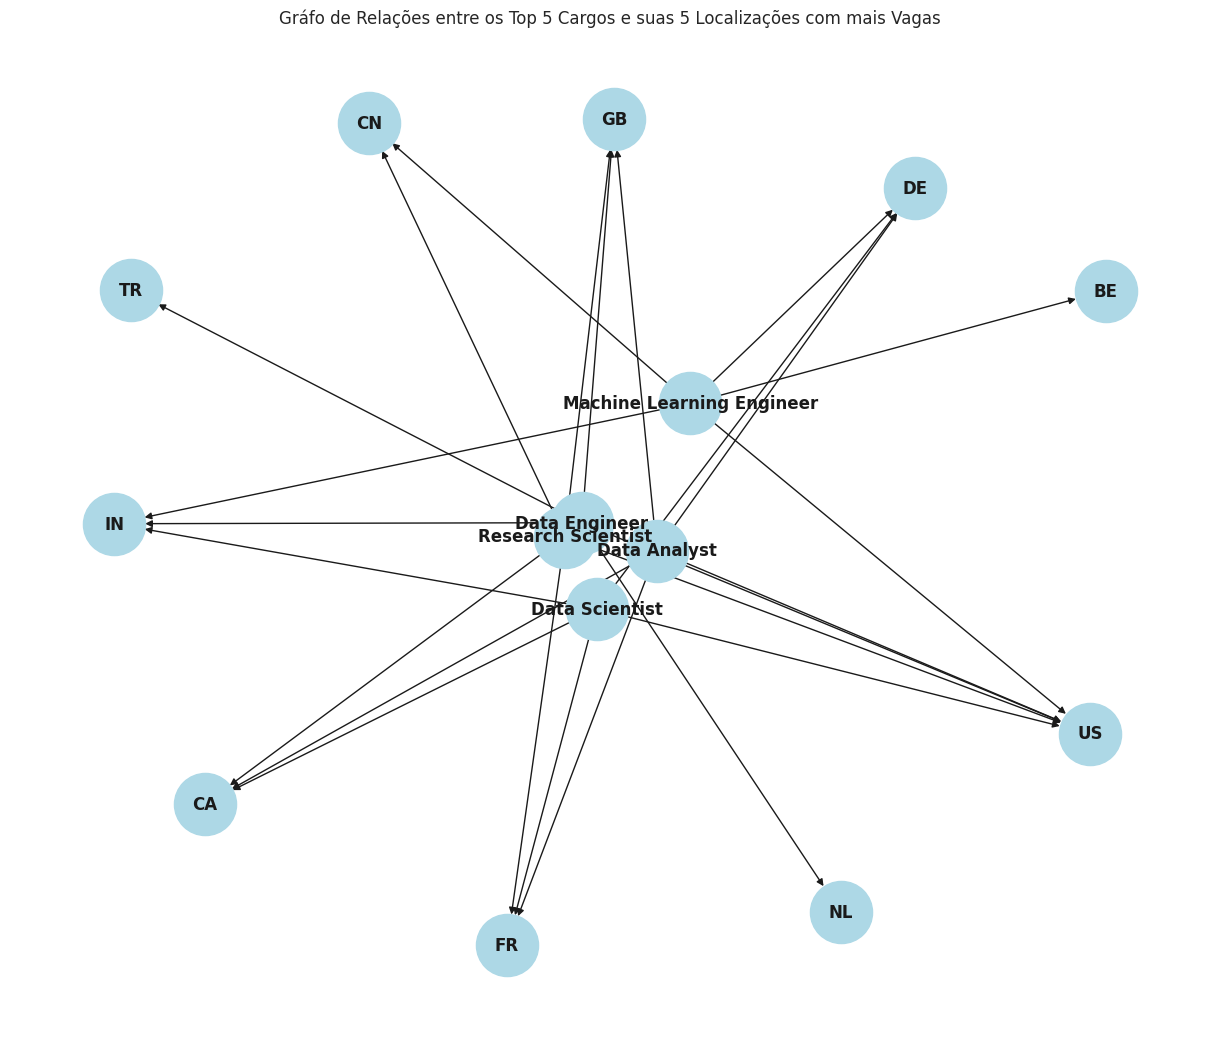

Componentes fracamente conectados:
[{'BE', 'Data Analyst', 'GB', 'TR', 'Research Scientist', 'FR', 'Machine Learning Engineer', 'IN', 'Data Scientist', 'NL', 'US', 'CN', 'Data Engineer', 'DE', 'CA'}]

Caminhos mais curtos entre os pares de nós:
{'US': {'US': ['US']}, 'Data Scientist': {'Data Scientist': ['Data Scientist'], 'US': ['Data Scientist', 'US'], 'DE': ['Data Scientist', 'DE'], 'FR': ['Data Scientist', 'FR'], 'IN': ['Data Scientist', 'IN'], 'CA': ['Data Scientist', 'CA']}, 'DE': {'DE': ['DE']}, 'FR': {'FR': ['FR']}, 'IN': {'IN': ['IN']}, 'CA': {'CA': ['CA']}, 'Data Engineer': {'Data Engineer': ['Data Engineer'], 'US': ['Data Engineer', 'US'], 'GB': ['Data Engineer', 'GB'], 'IN': ['Data Engineer', 'IN'], 'NL': ['Data Engineer', 'NL'], 'TR': ['Data Engineer', 'TR']}, 'GB': {'GB': ['GB']}, 'NL': {'NL': ['NL']}, 'TR': {'TR': ['TR']}, 'Data Analyst': {'Data Analyst': ['Data Analyst'], 'US': ['Data Analyst', 'US'], 'FR': ['Data Analyst', 'FR'], 'CA': ['Data Analyst', 'CA'], 'DE': ['D

In [ ]:
import pandas as pd  # Importação da biblioteca pandas para manipulação de dados
import networkx as nx  # Importação da biblioteca NetworkX para criação e manipulação de grafos
import matplotlib.pyplot as plt  # Importação da biblioteca Matplotlib para visualização de dados

# Carregar o DataFrame a partir de um arquivo CSV
df = pd.read_csv("/Data Science Jobs Salaries.csv")

# Calcular a contagem de vagas para cada localização e cargo
vagas_por_local_cargo = df.groupby(['company_location', 'job_title']).size().reset_index(name='num_vagas')

# Selecionar os top 5 cargos com a maior contagem de vagas
top_5_cargos = vagas_por_local_cargo.groupby('job_title')['num_vagas'].sum().nlargest(5).index.tolist()

# Criar um grafo direcionado usando NetworkX
G = nx.DiGraph()

# Iterar sobre cada cargo dos top 5
for cargo in top_5_cargos:
    # Filtrar as localizações que têm vagas para um cargo específico
    locais_com_vagas_por_cargo = vagas_por_local_cargo[vagas_por_local_cargo['job_title'] == cargo].nlargest(5, 'num_vagas')['company_location'].tolist()

    # Adicionar nós ao grafo com base nas localizações com mais vagas para esse cargo
    for loc in locais_com_vagas_por_cargo:
        G.add_node(loc)
        G.add_node(cargo)
        G.add_edge(cargo, loc)  # Adicionar uma aresta do cargo para a localização

# Desenhar o grafo usando Matplotlib
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", font_weight="bold", node_size=2000)
plt.title('Gráfo de Relações entre os Top 5 Cargos e suas 5 Localizações com mais Vagas')
plt.show()

# Encontrar componentes fracamente conectados
weakly_connected = list(nx.weakly_connected_components(G))
print("Componentes fracamente conectados:")
print(weakly_connected)

# Encontrar os caminhos mais curtos entre os nós
shortest_paths = dict(nx.all_pairs_shortest_path(G))
print("\nCaminhos mais curtos entre os pares de nós:")
print(shortest_paths)

# Encontrar os clusters
strongly_connected = list(nx.strongly_connected_components(G))
print("\nClusters identificados no grafo:")
print(strongly_connected)


**Explicando o GRAFO acima:**

Grafos são estruturas matemáticas utilizadas para modelar relações entre pares de objetos.Os grafos são ferramentas poderosas para representar, analisar e compreender uma variedade de relações complexas, e sua flexibilidade os torna relevantes em muitos campos diferentes.

**Componentes fracamente conectados:**

Esse resultado indica conjuntos de nós que estão interconectados por meio de conexões diretas ou indiretas.

**Caminhos mais curtos entre os pares de nós:**

Aqui, estão listados os caminhos mais curtos entre os diferentes nós do grafo. Cada chave representa um nó específico e os valores são os caminhos mais curtos entre esse nó e outros nós no grafo. Por exemplo, para o nó 'US', o caminho mais curto é ele mesmo ('US'), mas para 'Data Scientist', o caminho mais curto vai para 'US', 'DE', 'FR', 'IN ', 'CA'.

**Clusters identificados no gráfico:**

Os clusters são grupos de nós densamente interconectados dentro do grafo. Cada conjunto na lista representa um cluster identificado. No caso, temos clusters separados para diferentes elementos, como 'US', 'DE', 'Data Scientist', 'GB' etc., diminuindo que esses nós estão densamente conectados entre si.




---
Etapa 7: Visualização de Dados:

Criação de Gráficos: Utilizar bibliotecas de visualização de dados, como Matplotlib ou Seaborn, para criar gráficos que representam as análises feitas, como histogramas, gráficos de barras, gráficos de linha, etc.



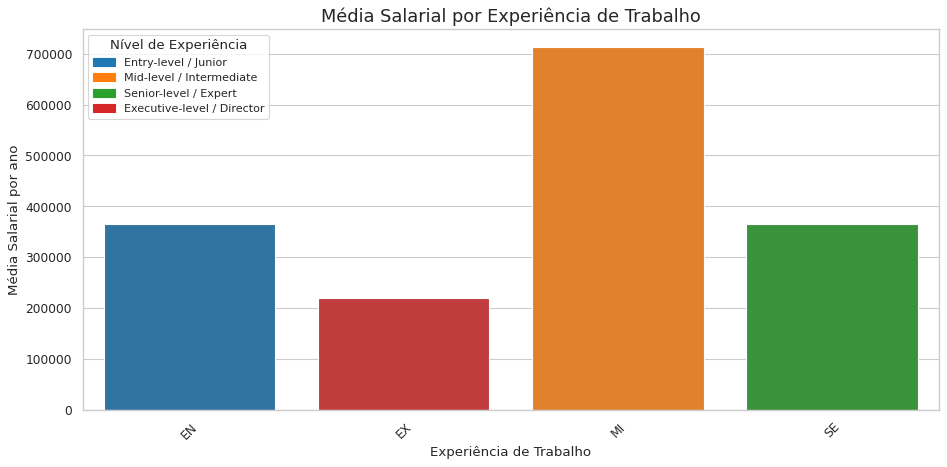

In [ ]:
#Gráfico Média Salarial por Experiência de Trabalho

# Importa as bibliotecas seaborn e matplotlib.pyplot
import seaborn as sns
import matplotlib.pyplot as plt


# Calcula a média salarial por experiência de trabalho
media_salario_por_experiencia = df_corrigido.groupby('Nível de Experiência')['Salário por ano'].mean().reset_index()

# Mapeia os valores de Nível de Experiência para suas descrições correspondentes
nivel_experiencia_descricao = {
    'EN': 'Entry-level / Junior',
    'MI': 'Mid-level / Intermediate',
    'SE': 'Senior-level / Expert',
    'EX': 'Executive-level / Director'
}

# Define uma paleta de cores para cada categoria de experiência
palette = {'EN': 'tab:blue', 'MI': 'tab:orange', 'SE': 'tab:green', 'EX': 'tab:red'}

# Ajusta o tamanho da figura e a resolução dos pontos por polegada (dpi)
plt.figure(figsize=(12, 6), dpi=80)

# Define o estilo do gráfico como 'whitegrid' utilizando seaborn
sns.set(style='whitegrid')

# Cria um gráfico de barras (barplot) utilizando os dados de média salarial por experiência de trabalho
sns.barplot(data=media_salario_por_experiencia, x='Nível de Experiência', y='Salário por ano', palette=palette)

# Adiciona um título ao gráfico com tamanho de fonte 16
plt.title('Média Salarial por Experiência de Trabalho', fontsize=16)

# Adiciona um rótulo no eixo x indicando a Experiência de Trabalho com tamanho de fonte 12
plt.xlabel('Experiência de Trabalho', fontsize=12)

# Adiciona um rótulo no eixo y indicando a Média Salarial com tamanho de fonte 12
plt.ylabel('Média Salarial por ano', fontsize=12)

# Rotaciona os rótulos do eixo x em 45 graus para melhorar a legibilidade
plt.xticks(rotation=45)

# Ajusta o layout do gráfico para evitar sobreposição de elementos
plt.tight_layout()

# Adiciona legenda customizada com os níveis de experiência e suas descrições correspondentes
legenda_personalizada = [plt.Rectangle((0,0),1,1, color=color) for color in palette.values()]
plt.legend(legenda_personalizada, nivel_experiencia_descricao.values(), title='Nível de Experiência', title_fontsize='12', fontsize='10', loc='upper left')

# Mostra o gráfico
plt.show()


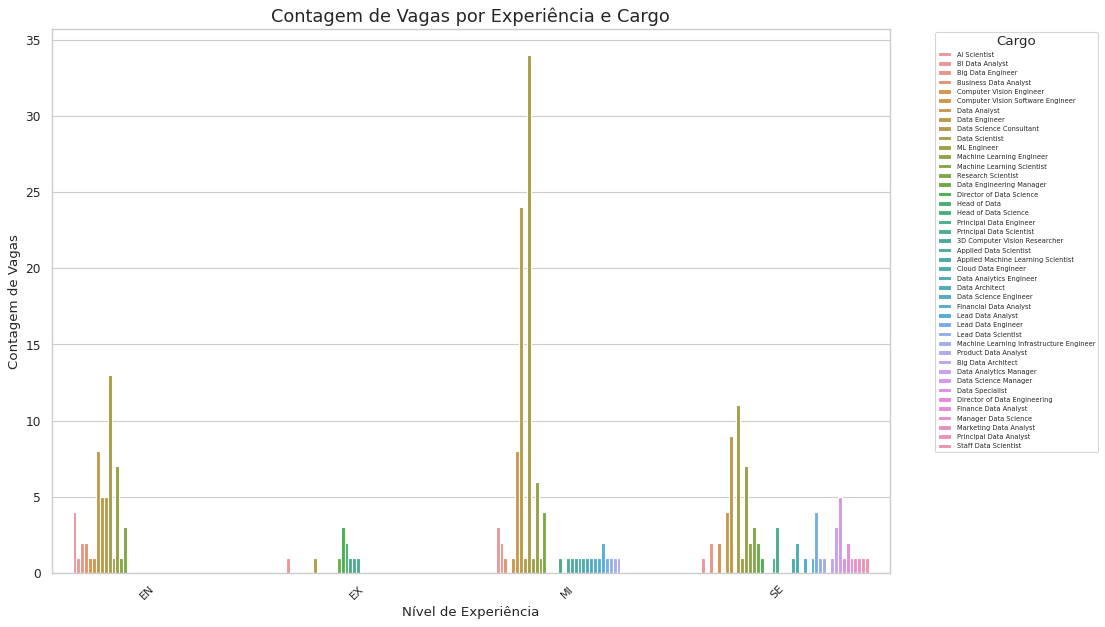

In [ ]:
#Gráfico Barras:  contagem de vagas por experiência e cargo

# Importa as bibliotecas seaborn e matplotlib.pyplot
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a contagem de vagas por experiência e cargo e reinicia os índices, atribuindo o nome 'Contagem de Vagas' à coluna de contagem
vagas_por_experiencia_cargo = df_corrigido.groupby(['Nível de Experiência', 'Cargo']).size().reset_index(name='Contagem de Vagas')

# Ajusta o tamanho da figura e a resolução dos pontos por polegada (dpi)
plt.figure(figsize=(14, 8), dpi=80)

# Define o estilo do gráfico como 'whitegrid' utilizando seaborn
sns.set(style='whitegrid')

# Cria um gráfico de barras (barplot) utilizando os dados de vagas por experiência e cargo
# Define 'Nível de Experiência' no eixo x, 'Contagem de Vagas' no eixo y, usando 'Cargo' para distinguir as barras (hue) e dodge=True para barras agrupadas
sns.barplot(data=vagas_por_experiencia_cargo, x='Nível de Experiência', y='Contagem de Vagas', hue='Cargo', dodge=True)

# Rotaciona os rótulos do eixo x em 45 graus, alinhados à direita, e define o tamanho da fonte para 10
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adiciona um título ao gráfico com tamanho de fonte 16
plt.title('Contagem de Vagas por Experiência e Cargo', fontsize=16)

# Adiciona um rótulo no eixo x indicando a Experiência com tamanho de fonte 12
plt.xlabel('Nível de Experiência', fontsize=12)

# Adiciona um rótulo no eixo y indicando a Contagem de Vagas com tamanho de fonte 12
plt.ylabel('Contagem de Vagas', fontsize=12)

# Adiciona uma legenda para os diferentes cargos no gráfico com ajustes de tamanho e localização
plt.legend(title='Cargo', title_fontsize='12', fontsize='6', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajusta o layout do gráfico para evitar sobreposição de elementos
plt.tight_layout()

# Mostra o gráfico
plt.show()


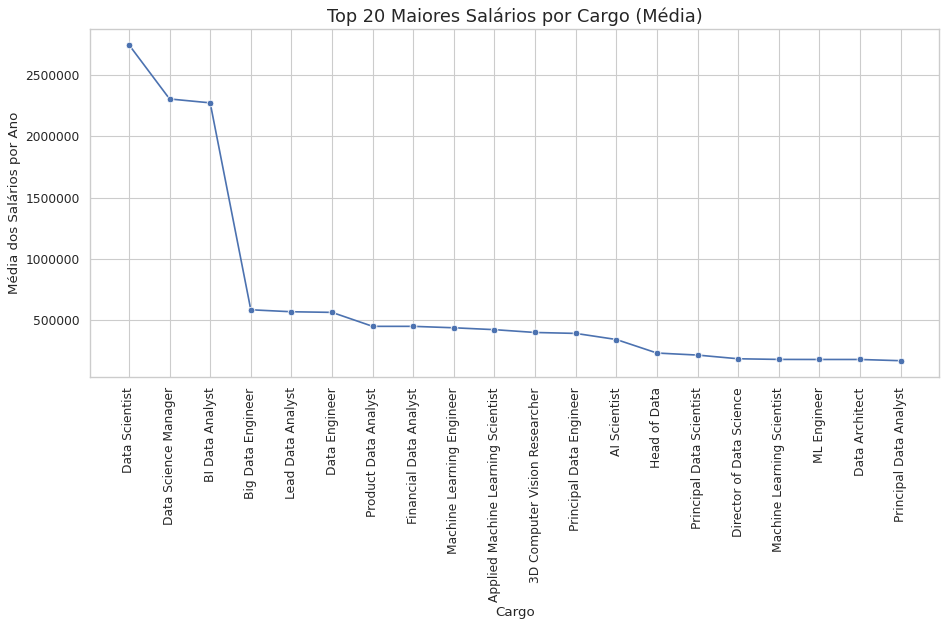

In [ ]:
# Importa as bibliotecas seaborn e matplotlib.pyplot
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Ordena o DataFrame por salário em ordem decrescente
df_corrigido = df_corrigido.sort_values(by='Salário por ano', ascending=False)

# Seleciona os top 20 salários para cada cargo
top_salarios_por_cargo = df_corrigido.groupby('Cargo').head(20)

# Calcula a média dos top 20 salários por cargo
media_top_salarios_por_cargo = top_salarios_por_cargo.groupby('Cargo')['Salário por ano'].mean().sort_values(ascending=False).head(20)

# Ajusta o tamanho da figura e a resolução dos pontos por polegada (dpi)
plt.figure(figsize=(12, 8), dpi=80)

# Define o estilo do gráfico como 'whitegrid' utilizando seaborn
sns.set(style='whitegrid')

# Cria um gráfico de linhas para mostrar os top 20 maiores salários por cargo em escala normal no eixo y
sns.lineplot(data=media_top_salarios_por_cargo, marker='o')

# Adiciona um título ao gráfico com tamanho de fonte 16
plt.title('Top 20 Maiores Salários por Cargo (Média)', fontsize=16)

# Adiciona um rótulo no eixo x indicando os cargos com tamanho de fonte 12
plt.xlabel('Cargo', fontsize=12)

# Adiciona um rótulo no eixo y indicando os salários com tamanho de fonte 12
plt.ylabel('Média dos Salários por Ano', fontsize=12)

# Rotaciona os rótulos do eixo x em 90 graus para melhorar a legibilidade
plt.xticks(rotation=90)

# Define o formato do eixo y para exibir valores completos
formatter = ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

# Ajusta o layout do gráfico para evitar sobreposição de elementos
plt.tight_layout()

# Mostra o gráfico
plt.show()


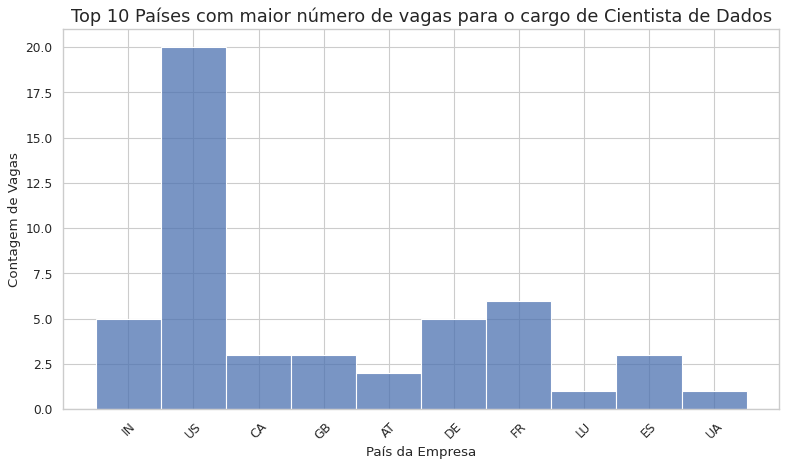

In [ ]:
# Importa as bibliotecas seaborn e matplotlib.pyplot
import seaborn as sns
import matplotlib.pyplot as plt

# Filtra o DataFrame para conter apenas dados do cargo de Data Scientist
data_scientist_data = df_corrigido[df_corrigido['Cargo'] == 'Data Scientist']

# Identifica os top 10 países com mais vagas para Data Scientist
top_10_paises = data_scientist_data['País da Empresa'].value_counts().head(10)

# Filtra o DataFrame original para conter apenas dados dos top 10 países
data_top_10_paises = data_scientist_data[data_scientist_data['País da Empresa'].isin(top_10_paises.index)]

# Ajusta o tamanho da figura e a resolução dos pontos por polegada (dpi)
plt.figure(figsize=(10, 6), dpi=80)

# Define o estilo do gráfico como 'whitegrid' utilizando seaborn
sns.set(style='whitegrid')

# Cria um histograma do número de vagas de emprego para Data Scientist nos top 10 países
sns.histplot(data=data_top_10_paises, x='País da Empresa', discrete=True)

# Adiciona um título ao gráfico com tamanho de fonte 16
plt.title('Top 10 Países com maior número de vagas para o cargo de Cientista de Dados', fontsize=16)

# Adiciona um rótulo no eixo x indicando os países com tamanho de fonte 12
plt.xlabel('País da Empresa', fontsize=12)

# Adiciona um rótulo no eixo y indicando a contagem de vagas com tamanho de fonte 12
plt.ylabel('Contagem de Vagas', fontsize=12)

# Rotaciona os rótulos do eixo x em 45 graus para melhorar a legibilidade
plt.xticks(rotation=45)

# Ajusta o layout do gráfico para evitar sobreposição de elementos
plt.tight_layout()

# Mostra o histograma
plt.show()


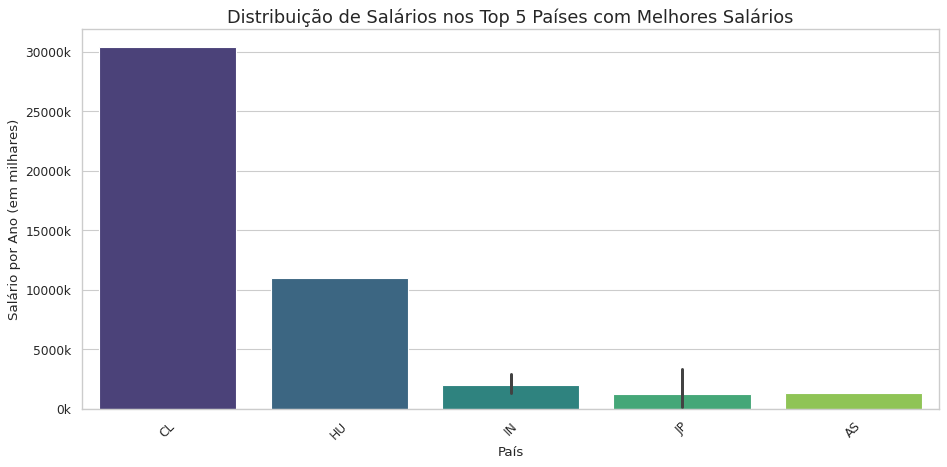

In [ ]:
# Importa as bibliotecas seaborn e matplotlib.pyplot
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Identifica os top 5 países com maiores salários
top_paises_salarios = df_corrigido.groupby('País da Empresa')['Salário por ano'].mean().nlargest(5).index

# Filtra o DataFrame para conter apenas dados dos top 5 países
top_5_paises_salarios = df_corrigido[df_corrigido['País da Empresa'].isin(top_paises_salarios)]

# Ajusta o tamanho da figura e a resolução dos pontos por polegada (dpi)
plt.figure(figsize=(12, 6), dpi=80)

# Define o estilo do gráfico como 'whitegrid' utilizando seaborn
sns.set(style='whitegrid')

# Cria um gráfico de barras para visualizar a distribuição de salários nos top 5 países
ax = sns.barplot(data=top_5_paises_salarios, x='País da Empresa', y='Salário por ano', palette='viridis')

# Adiciona um título ao gráfico com tamanho de fonte 16
plt.title('Distribuição de Salários nos Top 5 Países com Melhores Salários', fontsize=16)

# Adiciona um rótulo no eixo x indicando os países com tamanho de fonte 12
plt.xlabel('País', fontsize=12)

# Adiciona um rótulo no eixo y indicando os salários em milhares com tamanho de fonte 12
plt.ylabel('Salário por Ano (em milhares)', fontsize=12)

# Formata os valores do eixo y para exibir em milhares
formatter = FuncFormatter(lambda x, _: '{:.0f}k'.format(x / 1000))
ax.yaxis.set_major_formatter(formatter)

# Rotaciona os rótulos do eixo x em 45 graus para melhorar a legibilidade
plt.xticks(rotation=45)

# Ajusta o layout do gráfico para evitar sobreposição de elementos
plt.tight_layout()

# Mostra o gráfico de barras
plt.show()


Mapas: Se os dados incluírem localizações geográficas, considerar a criação de mapas interativos usando bibliotecas como Folium.


In [ ]:
#Mapa interativo que mostra a localização de cada país com suas respectivas médias salariais

# Importa as bibliotecas folium
import folium

# Cálculo da média dos salários por país
media_salarios_pais = df_corrigido.groupby('País da Empresa')['Salário por ano'].mean()

# Converter os valores de média salarial para inteiros
media_salarios_int = media_salarios_pais.apply(int)

# Coordenadas dos países listados
coordenadas_paises = {
   'AE': [24.4667, 54.3667],  # United Arab Emirates
    'AS': [-14.2704, -170.7046],  # American Samoa
    'AT': [48.2082, 16.3738],  # Austria
    'BE': [50.8503, 4.3517],  # Belgium
    'BR': [-15.7801, -47.9292],  # Brazil
    'CA': [56.1304, -106.3468],  # Canada
    'CH': [46.8182, 8.2275],  # Switzerland
    'CL': [-35.6751, -71.543],  # Chile
    'CN': [35.8617, 104.1954],  # China
    'CO': [4.5709, -74.2973],  # Colombia
    'DE': [51.1657, 10.4515],  # Germany
    'DK': [56.2639, 9.5018],  # Denmark
    'ES': [40.4637, -3.7492],  # Spain
    'FR': [46.6034, 1.8883],  # France
    'GB': [55.3781, -3.4360],  # United Kingdom
    'GR': [39.0742, 21.8243],  # Greece
    'HR': [45.1000, 15.2000],  # Croatia
    'HU': [47.1625, 19.5033],  # Hungary
    'IL': [31.0461, 34.8516],  # Israel
    'IN': [20.5937, 78.9629],  # India
    'IR': [32.4279, 53.6880],  # Iran
    'IT': [41.8719, 12.5674],  # Italy
    'JP': [36.2048, 138.2529],  # Japan
    'KE': [-0.0236, 37.9062],  # Kenya
    'LU': [49.8153, 6.1296],  # Luxembourg
    'MD': [47.4116, 28.3699],  # Moldova
    'MT': [35.9375, 14.3754],  # Malta
    'MX': [23.6345, -102.5528],  # Mexico
    'NG': [9.0820, 8.6753],  # Nigeria
    'NL': [52.1326, 5.2913],  # Netherlands
    'NZ': [-40.9006, 174.8860],  # New Zealand
    'PK': [30.3753, 69.3451],  # Pakistan
    'PL': [51.9194, 19.1451],  # Poland
    'PT': [39.3999, -8.2245],  # Portugal
    'RU': [61.5240, 105.3188],  # Russia
    'SG': [1.3521, 103.8198],  # Singapore
    'SI': [46.1512, 14.9955],  # Slovenia
    'TR': [38.9637, 35.2433],  # Turkey
    'UA': [48.3794, 31.1656],  # Ukraine
    'US': [37.0902, -95.7129],  # United States
    'VN': [14.0583, 108.2772]  # Vietnam
}

# Cria um mapa inicial utilizando folium
mapa = folium.Map(location=[20, 0], zoom_start=2)  # Coordenadas centrais para mostrar vários países

# Adiciona marcadores para cada país com suas coordenadas e média salarial
for pais, coordenadas in coordenadas_paises.items():
    if pais in media_salarios_pais.index:
        media = media_salarios_pais.loc[pais]
        folium.Marker(location=coordenadas, popup=f"País: {pais}<br>Média Salarial: {media:.2f}").add_to(mapa)

# Exibe o mapa interativo
mapa
